In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd       
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

import warnings
warnings.filterwarnings('ignore')

import random
import os
import glob
from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from tensorflow.random import set_seed
set_seed(42)

In [ ]:
IMG_SIZE = 224
BATCH = 32
SEED = 42


Read Data

In [ ]:
main_path = r'/content/drive/MyDrive/TLBO_CNN_python/archive/chest_xray/chest_xray/'


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]



test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [ ]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
...,...,...
5211,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5212,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5213,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5214,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


In [ ]:
df_test

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
...,...,...
619,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
620,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
621,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
622,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


In [ ]:
df_val

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
5,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
6,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
7,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
8,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
9,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


Previewing the images


Train Set - Normal


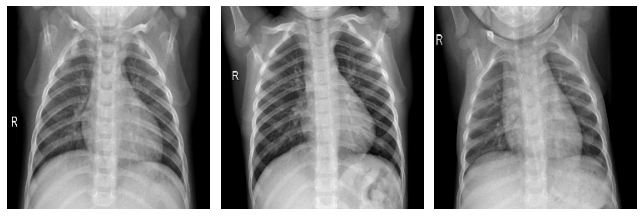

Train Set - Pneumonia


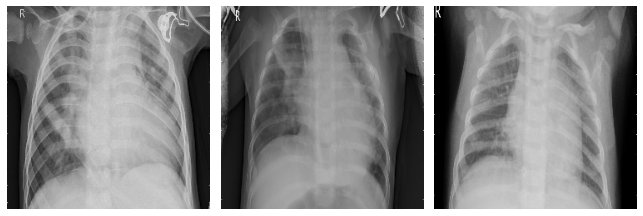

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 3):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()


print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 3):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
data = np.zeros((len(df_train), 150528))
labels = np.zeros(len(df_train))
labels = pd.DataFrame(labels)
for i in range(len(df_train)):
  img = cv2.imread(df_train['image'][i])
  img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
  data[i, :] = img.flatten()
  labels[0][i] = df_train['class'][i]

In [ ]:
import math
def fitness(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return fitness_value

data2 = pd.DataFrame(data)

In [ ]:
dim = 150528  # dimension of sample
n = len(df_train)  # number of samples
max_iter = 5  # maximum repeat number

#TLBO algorithm implementation
for iter in range(max_iter):
    # teaching phase
    f = []  # create the fitness list
    for i in range(n):  # check each sample
        f.append(fitness(data2.iloc[i, :]))
    pos = np.argmin(f)  # position of minimum fitness
    X_teacher = data2.iloc[pos, :]  # select the teacher as learner with minimum fitness
    X_mean = data2.mean(0)  # mean of total samples
    TF = random.randint(1, 2)  # TF is the teaching factor and is either 1 or 2(chosen randomly)
    r = random.random()  # random number range from 0 to 1
    for i in range(n):
        Xnew = data2.iloc[i, :] + r * (X_teacher - TF * X_mean)
        fnew = fitness(Xnew)
        if fnew < fitness(data2.iloc[i, :]):
            data2.iloc[i, :] = Xnew

    # learning phase
    p = random.randint(1, n-1)
    X_partner = data2.iloc[p, :]  # randomly chosen sample
    if fitness(data2.iloc[i, :]) < fitness(X_partner):
        Xnew = data2.iloc[i, :] + r * (data2.iloc[i, :] - X_partner)
    else:
        Xnew = data2.iloc[i, :] - r * (data2.iloc[i, :] - X_partner)

    fnew = fitness(Xnew)
    if fnew < fitness(data2.iloc[i, :]):
        data2.iloc[i, :] = Xnew

In [ ]:
data2 = np.array(data2)
data2 = np.reshape(data2, newshape=(data2.shape[0], IMG_SIZE, IMG_SIZE, 3))

In [ ]:
data2.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
labels2 = lab.fit_transform(labels)

In [ ]:
data_0 = np.zeros((len(df_test), 150528))
labels_0 = np.zeros(len(df_test))
labels_0 = pd.DataFrame(labels_0)
for i in range(len(df_test)):
  img = cv2.imread(df_test['image'][i])
  img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
  data_0[i, :] = img.flatten()
  labels_0[0][i] = df_test['class'][i]

In [ ]:
data3 = pd.DataFrame(data_0)

In [ ]:
dim = 150528  # dimension of sample
n = len(df_test)  # number of samples
max_iter = 5  # maximum repeat number

#TLBO algorithm implementation
for iter in range(max_iter):
    # teaching phase
    f = []  # create the fitness list
    for i in range(n):  # check each sample
        f.append(fitness(data3.iloc[i, :]))
    pos = np.argmin(f)  # position of minimum fitness
    X_teacher = data3.iloc[pos, :]  # select the teacher as learner with minimum fitness
    X_mean = data3.mean(0)  # mean of total samples
    TF = random.randint(1, 2)  # TF is the teaching factor and is either 1 or 2(chosen randomly)
    r = random.random()  # random number range from 0 to 1
    for i in range(n):
        Xnew = data3.iloc[i, :] + r * (X_teacher - TF * X_mean)
        fnew = fitness(Xnew)
        if fnew < fitness(data3.iloc[i, :]):
            data3.iloc[i, :] = Xnew

    # learning phase
    p = random.randint(1, n-1)
    X_partner = data3.iloc[p, :]  # randomly chosen sample
    if fitness(data3.iloc[i, :]) < fitness(X_partner):
        Xnew = data3.iloc[i, :] + r * (data3.iloc[i, :] - X_partner)
    else:
        Xnew = data3.iloc[i, :] - r * (data3.iloc[i, :] - X_partner)

    fnew = fitness(Xnew)
    if fnew < fitness(data3.iloc[i, :]):
        data3.iloc[i, :] = Xnew

In [ ]:
data3 = np.array(data3)
data3 = np.reshape(data3, newshape=(data3.shape[0], IMG_SIZE, IMG_SIZE, 3))

In [ ]:
data3.shape

In [ ]:
labels3 = lab.fit_transform(labels_0)

In [ ]:
data_00 = np.zeros((len(df_val), 150528))
labels_00 = np.zeros(len(df_val))
labels_00 = pd.DataFrame(labels_00)
for i in range(len(df_val)):
  img = cv2.imread(df_val['image'][i])
  img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
  data_00[i, :] = img.flatten()
  labels_00[0][i] = df_val['class'][i]

In [ ]:
data4 = pd.DataFrame(data_00)

In [ ]:
dim = 150528  # dimension of sample
n = len(df_val)  # number of samples
max_iter = 5  # maximum repeat number

#TLBO algorithm implementation
for iter in range(max_iter):
    # teaching phase
    f = []  # create the fitness list
    for i in range(n):  # check each sample
        f.append(fitness(data4.iloc[i, :]))
    pos = np.argmin(f)  # position of minimum fitness
    X_teacher = data4.iloc[pos, :]  # select the teacher as learner with minimum fitness
    X_mean = data4.mean(0)  # mean of total samples
    TF = random.randint(1, 2)  # TF is the teaching factor and is either 1 or 2(chosen randomly)
    r = random.random()  # random number range from 0 to 1
    for i in range(n):
        Xnew = data4.iloc[i, :] + r * (X_teacher - TF * X_mean)
        fnew = fitness(Xnew)
        if fnew < fitness(data4.iloc[i, :]):
            data4.iloc[i, :] = Xnew

    # learning phase
    p = random.randint(1, n-1)
    X_partner = data4.iloc[p, :]  # randomly chosen sample
    if fitness(data4.iloc[i, :]) < fitness(X_partner):
        Xnew = data4.iloc[i, :] + r * (data4.iloc[i, :] - X_partner)
    else:
        Xnew = data4.iloc[i, :] - r * (data4.iloc[i, :] - X_partner)

    fnew = fitness(Xnew)
    if fnew < fitness(data4.iloc[i, :]):
        data4.iloc[i, :] = Xnew

In [ ]:
data4 = np.array(data4)
data4 = np.reshape(data4, newshape=(data4.shape[0], IMG_SIZE, IMG_SIZE, 3))

In [ ]:
data4.shape

In [ ]:
labels4 = lab.fit_transform(labels_00)

ResNet

In [ ]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(data2, labels2,
          batch_size = BATCH, epochs = 50);

Evaluation

In [ ]:
predictions = model_pretrained.predict(data3, steps=len(data3), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(labels3, pred_labels))

Test Accuracy:  0.8301282051282052


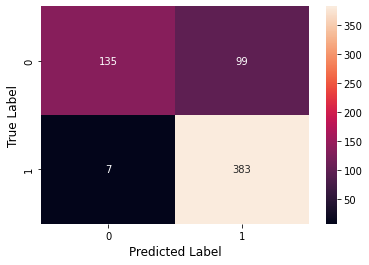

In [ ]:
confusion_matrix = metrics.confusion_matrix(labels3, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(classification_report(labels3, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.58      0.72       234
   Normal (Class 1)       0.79      0.98      0.88       390

           accuracy                           0.83       624
          macro avg       0.87      0.78      0.80       624
       weighted avg       0.85      0.83      0.82       624



DenseNet

In [ ]:
base_model = tf.keras.applications.DenseNet201(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

74836368/74836368 [==============================] - 6s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(data2, labels2,
          batch_size = BATCH, epochs = 50)

Evoluation 2

In [ ]:
predictions = model_pretrained.predict(data3, steps=len(data3), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(labels3, pred_labels))

In [ ]:
confusion_matrix = metrics.confusion_matrix(labels3, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(classification_report(labels3, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))